In [69]:
import matplotlib.pyplot as plt
import calendar
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import & Explore Data

In [70]:

df = pd.read_csv('fcc-forum-pageviews.csv')

df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [72]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


# Clean & Format Data

In [73]:
rem_top_outliers = df['value'] <= df['value'].quantile(0.975)
rem_bot_outliers = df['value'] >= df['value'].quantile(0.025)

df = df[rem_top_outliers & rem_bot_outliers].copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 10 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1238 non-null   object
 1   value   1238 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.0+ KB


# Visualize Data

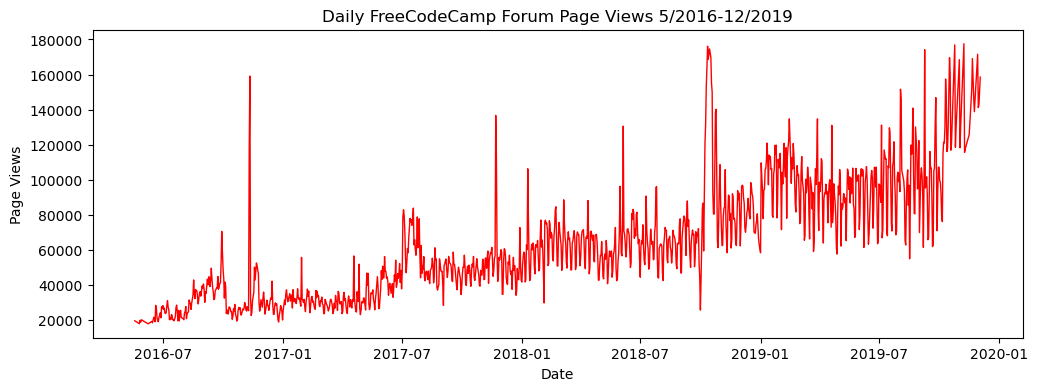

In [74]:
def draw_line_plot():
    
    # Draw line plot
    df['date'] = pd.to_datetime(df['date'])
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(df['date'], df['value'], color='r', linewidth=1)
    ax.set_title('Daily FreeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    plt.show()

draw_line_plot()



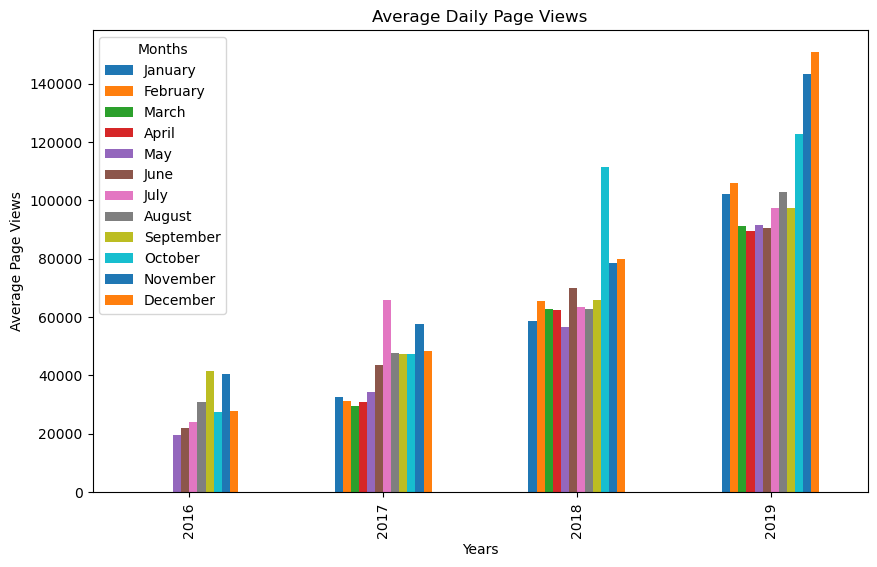

In [124]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    data = df.copy()
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    df_bar = data.groupby(['year','month'])['value'].mean().unstack()
    
    # Get month names
    month_names = [calendar.month_name[i] for i in range(1, 13)]  

    # Draw bar plot
    fig,ax = plt.subplots(figsize=(10,6))
    df_bar.plot(kind='bar',ax=ax)
    ax.set_title('Average Daily Page Views')
    ax.legend(labels=month_names, title='Months', loc='upper left')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    plt.show()

draw_bar_plot()

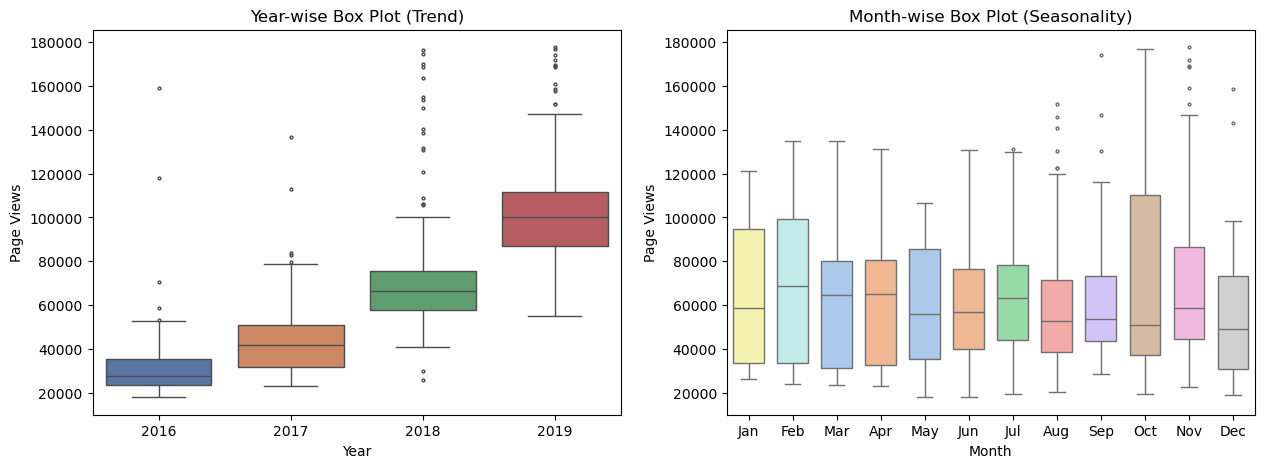

In [122]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    
    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1,2, figsize=(15,5))

    # Year-wise Box Plot
    sns.boxplot(x='year',y='value', hue='year', data=df_box,\
                ax=axes[0], legend=False, fliersize=2, palette='deep')
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise Box Plot
    sns.boxplot(x='month', y='value', hue='month', data=df_box,\
                ax=axes[1], order=['Jan', 'Feb', 'Mar', 'Apr', 'May',\
                 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                width=0.7, legend=False, fliersize=2, palette='pastel') 
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')



draw_box_plot()